In [1]:
from fbprophet import Prophet
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
#univariate

(39, 2)


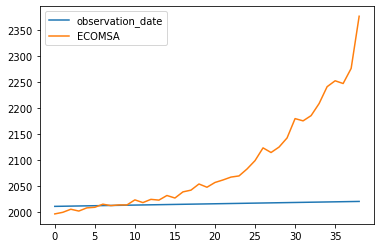

In [2]:
turkey = pd.read_excel("TurkeyData.xlsx",header=0)
turkey.plot()
print(turkey.shape)
pyplot.show()

In [3]:
turkey.columns = ['ds', 'y']
turkey
turkey['ds']= pd.to_datetime(turkey['ds'])

In [4]:
model = Prophet()

In [5]:
model.fit(turkey)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds           yhat     yhat_lower     yhat_upper
0 2019-01-01   82975.202193   77913.719313   87421.756870
1 2019-04-01   89561.226340   84657.597918   94555.433216
2 2019-07-01   98773.582849   93360.259054  103908.472155
3 2019-10-01  102152.876028   96917.967972  106945.187053
4 2020-01-01  107349.282070  102521.779752  112374.830146
5 2020-04-01  115081.530896  109846.619998  120028.226027
6 2020-07-01  130974.732092  126041.904748  136294.864439
7 2020-10-01  127562.233176  122295.058861  132685.674113


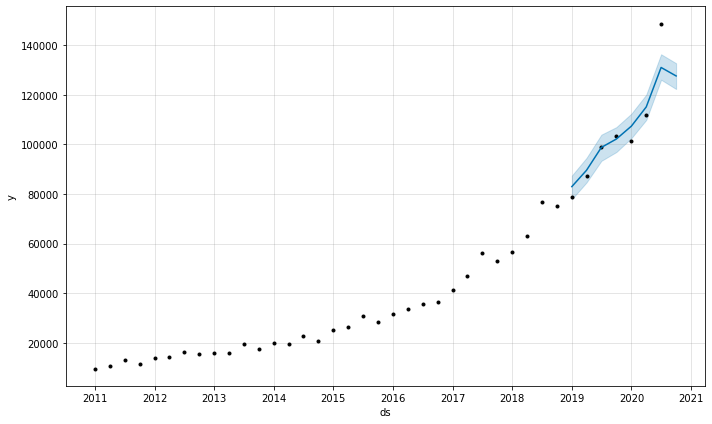

In [16]:
# define the period for which we want a prediction
future = list()
for i in range(1,12,3):
    date = '2019-%02d' % i
    future.append([date])
    date = '2020-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
# plot forecast
model.plot(forecast)
pyplot.show()

           ds         y
22 2016-07-01  35564.10
23 2016-10-01  36377.03
24 2017-01-01  41252.10
25 2017-04-01  47138.21
26 2017-07-01  56096.90


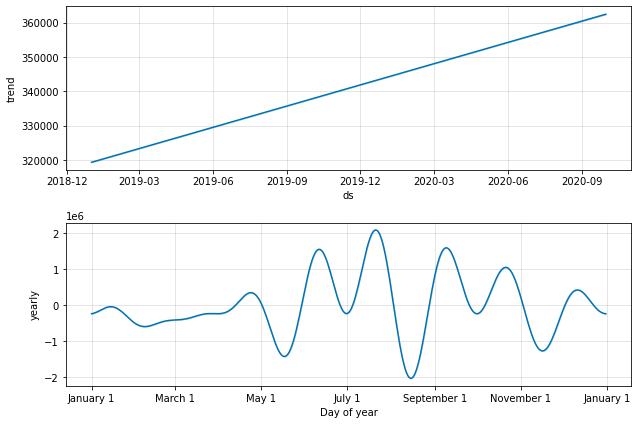

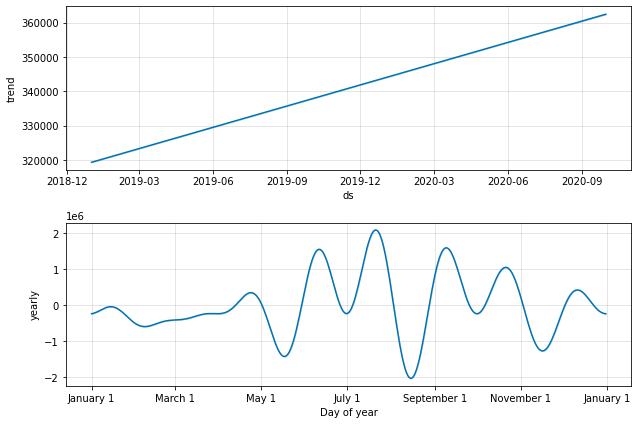

In [17]:
# create test dataset, remove last 12 months
train = turkey.drop(turkey.index[-12:])
print(train.tail())
model.plot_components(forecast)

In [20]:
len(forecast['yhat'].values)

8

In [22]:
from sklearn.metrics import mean_absolute_error
# calculate MAE between expected and predicted values for december
y_true = turkey['y'][-8:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 11396.135


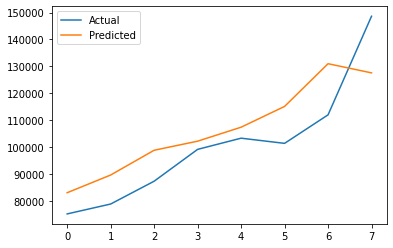

In [23]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()